# BOSTON HOUSE PRICE PRED
using linear reg and XGboost<br>
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#importing data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# df=pd.read_csv('housing.csv',names=column_names)
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# data info

#print(df)
# df.columns
df.describe()
# df.info()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#watching outliers


## 
EDA

In [6]:
# sns.pairplot(df)

<Axes: >

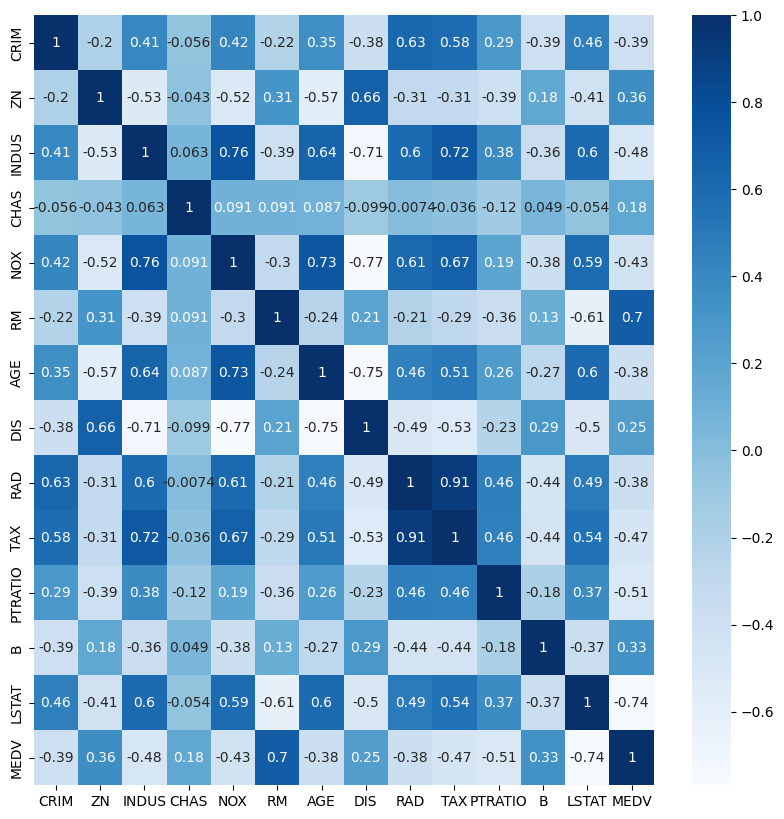

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

##
Train_Test_Split (using scikit-learn)

In [8]:
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=df['MEDV']


In [10]:
from sklearn.model_selection import train_test_split as t_t_s

In [11]:
X_train,X_test,y_train,y_test=t_t_s(X,y,test_size=0.25,random_state=101)

##
creating linear reg model


In [12]:

from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [13]:
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
lm.coef_

array([-9.40841894e-02,  4.95073284e-02,  1.30221740e-02,  3.24840291e+00,
       -1.66996247e+01,  3.54123029e+00,  2.41118505e-04, -1.50886686e+00,
        2.60240651e-01, -9.70637490e-03, -9.21868535e-01,  7.16513869e-03,
       -5.76869967e-01])

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [16]:
cdf = pd.DataFrame({'coeff': lm.coef_}, index=X.columns)
cdf

,coeff
CRIM,-0.094084
ZN,0.049507
INDUS,0.013022
CHAS,3.248403
NOX,-16.699625
RM,3.541230
AGE,0.000241
DIS,-1.508867
RAD,0.260241
TAX,-0.009706


##
prediction 

In [17]:
prediction=lm.predict(X_test)
prediction


array([40.46905482, 27.48120388, 16.57965361, 17.25752098, 31.39520193,
       32.64431924, 39.06872397,  8.22059803, 33.38495231,  7.43937604,
       30.51155682, 13.63023248, 16.45281386, 17.07791868, 25.23724098,
       20.36845812,  7.25514813, 33.40324566, 28.5487538 , 24.69127874,
       12.78280414, 20.382864  , 22.50112749, 24.67654135, 34.28272578,
       18.97331313, 31.91950278, 18.89446329, 26.97890192, 34.44931081,
       19.71844927, 18.39473031, 37.27286953, 44.79379594, 30.55448818,
       22.42790327, 16.17607408, 17.87635192,  4.68740441, 30.68341654,
       24.0987276 , 16.90711632, 34.81074416, 14.03476918, 17.95932426,
       25.23662931, 30.62148448, 16.32807315, 26.73434495, 22.6765835 ,
       32.28505539, 37.82975383, 22.58987083, 16.85642003, 30.24978834,
        0.17824114, 20.35221329, 16.91823126, 22.80128185, 20.94566272,
       30.88273045,  3.36281546, 15.38435254, 19.81550756, 10.34643199,
       24.54122716, 24.24164013, 19.8464533 , 18.06516949, 19.19

##
evaluate

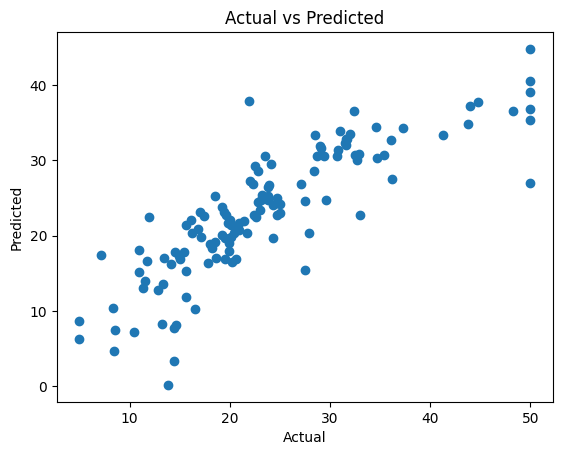

In [18]:

plt.scatter(y_test, prediction)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


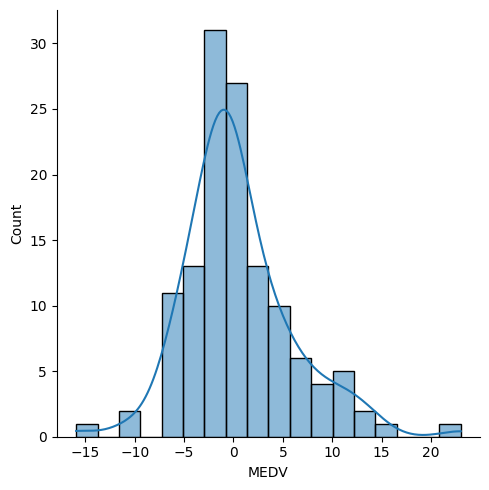

In [19]:
sns.displot((y_test-prediction),kde=True)

In [20]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)


3.8982633782769667

In [21]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

np.float64(5.488082407493909)

##
creating xgboost regressor model

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
model = XGBRegressor()

In [23]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [24]:
# model.coef_ {not possible as  Linear Regression: It’s a linear model.Has coefficients (.coef_) for each feature, representing the linear relationship.
#              but XGBRegressor: It’s a tree-based ensemble model (gradient boosting).Does not use coefficients like linear regression.
#              So, it will raise error "AttributeError: 'XGBRegressor' object has no attribute 'coef_' "}

##
Prediction xgboost

In [25]:
pred=model.predict(X_test)
pred

array([43.985447 , 33.67393  , 12.189536 , 17.156101 , 27.680637 ,
       31.355587 , 41.3348   , 17.079176 , 41.976425 ,  6.8538876,
       26.771198 , 14.030131 , 18.971636 , 21.224499 , 21.648016 ,
       21.00155  ,  8.022101 , 31.002766 , 24.873966 , 23.105091 ,
       12.64914  , 20.69148  , 19.724506 , 31.356762 , 33.070217 ,
       19.654203 , 26.908575 , 16.460089 , 47.166237 , 32.76303  ,
       21.35912  , 18.825693 , 32.819527 , 43.139557 , 25.405977 ,
       23.520897 , 14.191135 , 18.59525  ,  7.7457457, 31.176628 ,
       21.878088 , 22.65142  , 39.373413 , 11.407124 , 21.896618 ,
       22.663122 , 30.103785 , 14.657377 , 25.238035 , 33.017193 ,
       35.97807  , 41.547375 , 22.251461 , 22.053488 , 32.84406  ,
       13.050549 , 18.332619 , 18.092974 , 21.421764 , 18.49133  ,
       32.913525 , 12.740023 , 24.246492 , 21.87626  ,  8.81767  ,
       24.849928 , 24.975992 , 19.678587 , 11.351959 , 18.778423 ,
       20.806852 , 22.118467 , 18.288465 , 19.7233   , 23.8640

##
Evaluation

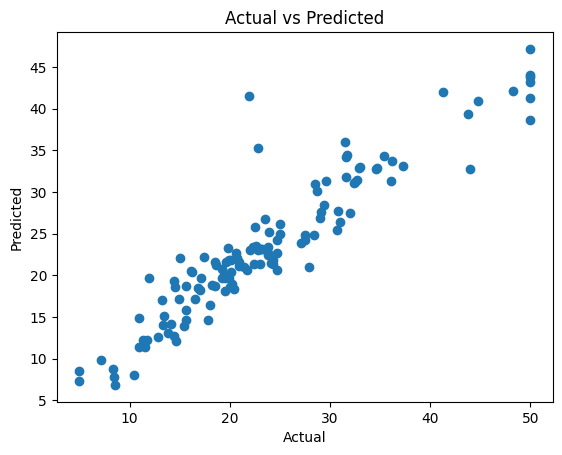

In [26]:
plt.scatter(y_test, pred)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

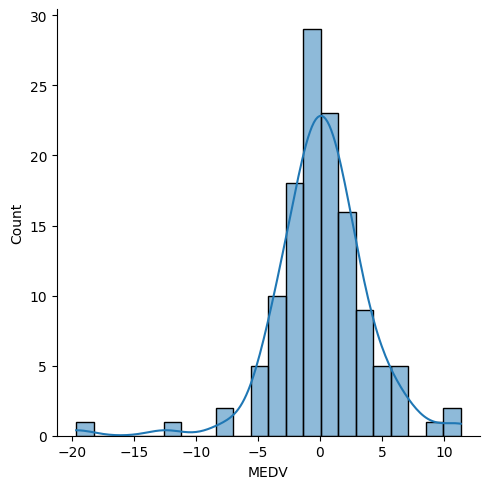

In [27]:
sns.displot((y_test-pred),kde=True)

In [28]:
from sklearn import metrics

# MAE 
MAE=metrics.mean_absolute_error(y_test,pred)
print('Mean absolute error=',MAE)


Mean absolute error= 2.5924116089588076


In [29]:
# RMS error
RMS=np.sqrt(metrics.mean_squared_error(y_test,pred))
print('root mean sq error=',RMS)

root mean sq error= 3.793440912362814
